## I. Build A Linear Regression Model

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from statsmodels.formula.api import ols

In [32]:
import kagglehub
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

# Load the dataset
day = pd.read_csv(f"{path}/day.csv", parse_dates=True)

print("Path to dataset files:", path)
print("Dataset loaded successfully.")


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1
Dataset loaded successfully.


In [33]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [34]:
# Data preprocessing
## Convert 'dteday' to datetime
day['dteday'] = pd.to_datetime(day['dteday'])

## Encode season as categorical features
day['winter'] = day['season'].map(lambda x: 1 if x == 1 else 0)
day['spring'] = day['season'].map(lambda x: 1 if x == 2 else 0)
day['summer'] = day['season'].map(lambda x: 1 if x == 3 else 0)
day['fall'] = day['season'].map(lambda x: 1 if x == 4 else 0)

In [35]:
# Reserve some data for testing 사이킷런을 이용하여, 훈련용과 테스트용을 나누는 코드입니다.
day_train, day_test = train_test_split(day, test_size=0.25, random_state=1234)#75% 훈련용으로 25%를 테스트용으로
print(day_train.shape, day_test.shape)

(548, 20) (183, 20)


array([[<Axes: xlabel='instant', ylabel='instant'>,
        <Axes: xlabel='season', ylabel='instant'>,
        <Axes: xlabel='yr', ylabel='instant'>,
        <Axes: xlabel='mnth', ylabel='instant'>,
        <Axes: xlabel='holiday', ylabel='instant'>,
        <Axes: xlabel='weekday', ylabel='instant'>,
        <Axes: xlabel='workingday', ylabel='instant'>,
        <Axes: xlabel='weathersit', ylabel='instant'>,
        <Axes: xlabel='temp', ylabel='instant'>,
        <Axes: xlabel='atemp', ylabel='instant'>,
        <Axes: xlabel='hum', ylabel='instant'>,
        <Axes: xlabel='windspeed', ylabel='instant'>,
        <Axes: xlabel='casual', ylabel='instant'>,
        <Axes: xlabel='registered', ylabel='instant'>,
        <Axes: xlabel='cnt', ylabel='instant'>,
        <Axes: xlabel='winter', ylabel='instant'>,
        <Axes: xlabel='spring', ylabel='instant'>,
        <Axes: xlabel='summer', ylabel='instant'>,
        <Axes: xlabel='fall', ylabel='instant'>],
       [<Axes: xlabel='instan

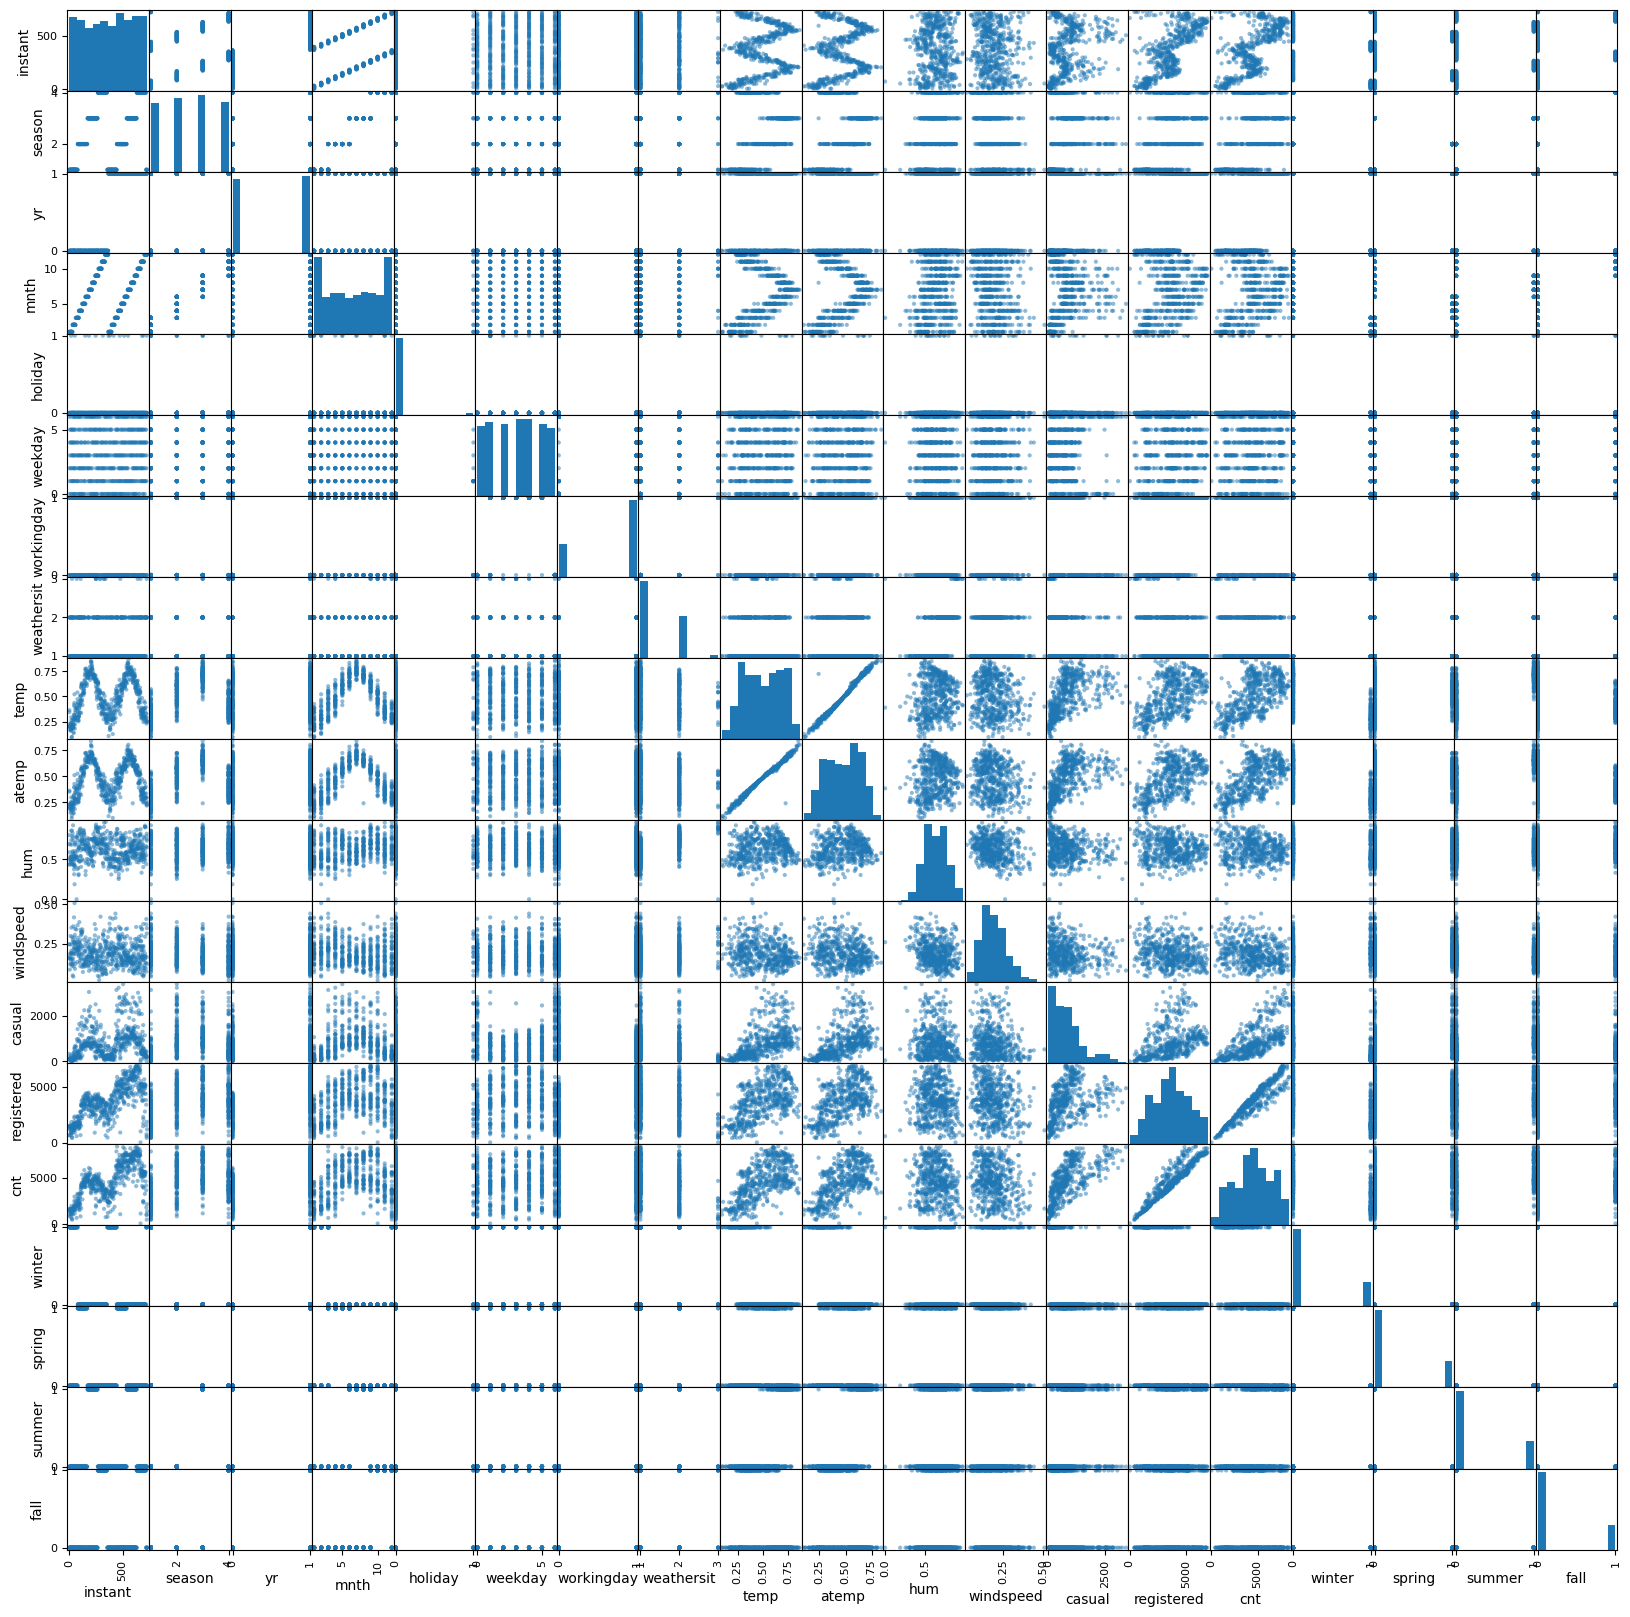

In [36]:
pd.plotting.scatter_matrix(day_train, figsize=(20, 20)) #산점도 행렬을 보여줌
# import seaborn as sns
# sns.set_theme(style="ticks")
# sns.pairplot(day_train) #보고나니깐 CNT부분의 양의 상관관게가 보이네.

In [37]:
# Remove irrelavant features 불필요한 정보를 삭제한 느낌?
day_train.drop(['instant','dteday', 'atemp', 'casual', 'registered'], axis=1, inplace=True)
day_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,winter,spring,summer,fall
271,4,0,9,0,4,1,1,0.616667,0.699167,0.172883,4839,0,0,0,1
565,3,1,7,0,4,1,1,0.770000,0.600417,0.165429,6591,0,0,1,0
449,2,1,3,0,0,0,2,0.437500,0.880833,0.220775,4996,0,1,0,0
342,4,0,12,0,5,1,1,0.290833,0.695833,0.082717,3620,0,0,0,1
488,2,1,5,0,4,1,2,0.560000,0.768333,0.133696,6421,0,1,0,0


In [38]:
# Convert season to numerical features
day_train['season'] = day_train['season'].astype('category')
day_train.dtypes

,0
season,category
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
hum,float64
windspeed,float64


In [39]:
# Create dummy variables for season
day_train[['Is_Spring', 'Is_Summer', 'Is_Fall']] = pd.get_dummies(day_train['season'], drop_first=True)
day_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,winter,spring,summer,fall,Is_Spring,Is_Summer,Is_Fall
271,4,0,9,0,4,1,1,0.616667,0.699167,0.172883,4839,0,0,0,1,False,False,True
565,3,1,7,0,4,1,1,0.770000,0.600417,0.165429,6591,0,0,1,0,False,True,False
449,2,1,3,0,0,0,2,0.437500,0.880833,0.220775,4996,0,1,0,0,True,False,False
342,4,0,12,0,5,1,1,0.290833,0.695833,0.082717,3620,0,0,0,1,False,False,True
488,2,1,5,0,4,1,2,0.560000,0.768333,0.133696,6421,0,1,0,0,True,False,False


In [40]:
day_train.drop(['season'], axis=1, inplace=True)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
input_col = [x for x in day_train.columns if x != 'cnt']
print("Input columns:", input_col)
model.fit(day_train[input_col], day_train['cnt'])

Input columns: ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'winter', 'spring', 'summer', 'fall', 'Is_Spring', 'Is_Summer', 'Is_Fall']


LinearRegression()

In [42]:
# Evaluate the performance of the model 필요없는 열을 제거한거지.
day_test[['Is_Spring', 'Is_Summer', 'Is_Fall']] = pd.get_dummies(day_test['season'], drop_first=True)
day_test.drop(['instant', 'atemp', 'casual', 'registered', 'dteday', 'season'], axis=1, inplace=True)
day_test.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,winter,spring,summer,fall,Is_Spring,Is_Summer,Is_Fall
21,0,1,0,6,0,1,0.059130,0.400000,0.171970,981,1,0,0,0,False,False,False
322,0,11,0,6,0,1,0.329167,0.502083,0.224496,3663,0,0,0,1,False,False,True
277,0,10,0,3,1,1,0.538333,0.647917,0.177250,4826,0,0,0,1,False,False,True
524,1,6,0,5,1,1,0.649167,0.467917,0.175383,7736,0,1,0,0,True,False,False
131,0,5,0,4,1,1,0.535000,0.747500,0.189667,4864,0,1,0,0,True,False,False


In [43]:
# Get predictions on test instances
test_predictions = model.predict(day_test[input_col])
# print(test_predictions)
# Calculate the mean squared error of the predictions 테스트에 대한
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(day_test['cnt'], test_predictions)

r2 = r2_score(day_test['cnt'], test_predictions)
print("MSE:", mse)
print("R^2:", r2)

MSE: 556776.9797629609
R^2: 0.8331839008862052


In [44]:
train_predictions = model.predict(day_train[input_col])
mse = mean_squared_error(day_train['cnt'], train_predictions)
r2 = r2_score(day_train['cnt'], train_predictions)
print("MSE:", mse)
print("R^2:", r2)
print("Root MSE:", mse**0.5)

MSE: 708931.9843301155
R^2: 0.8171648817438474
Root MSE: 841.9809881049069


<Axes: >

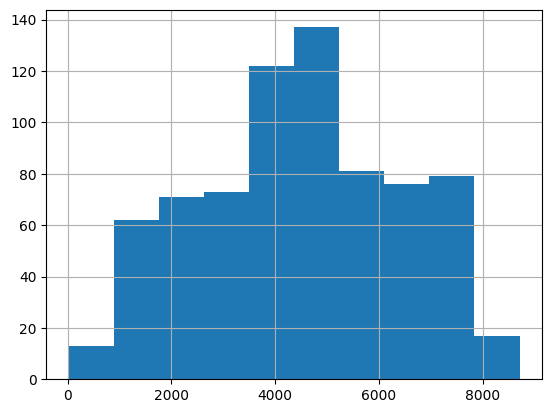

In [45]:
# What's the distribution of the target feature
day['cnt'].hist()

In [46]:
# Show model parameters
print(model.coef_, model.intercept_)

[ 2074.24271911   -12.52271371  -545.43377136    69.55038282
   108.79969466  -600.59402525  5024.11133151 -1149.94456721
 -3162.12089394  -702.46324771   201.1534894     87.33946248
   413.97029584   201.1534894     87.33946248   413.97029584] 2780.2994341929425


## II. Interpret Model
- Interpret model parameters
- Analyze feature importance
- Interpret individual predictions

In [48]:
df = pd.read_csv('day.csv')

In [49]:
# Data cleaning and feature engineering #원핫콛딩
df['summer'] = df['season'].map(lambda x: 1 if x == 3 else 0)
df['fall'] = df['season'].map(lambda x: 1 if x == 4 else 0)
df['winter'] = df['season'].map(lambda x: 1 if x == 1 else 0)
df['misty'] = df['weathersit'].map(lambda x: 1 if x == 2 else 0)
df['rain_snow_storm'] = df['weathersit'].map(lambda x: 1 if x > 2 else 0)
df['dteday'] = pd.to_datetime(df['dteday'])
df['days_since_2011'] = df['dteday'].map(lambda x: (x - df.loc[0, 'dteday']).days)
df['temp'] = df['temp'] * (39 - (-8)) + (-8)
df['windspeed'] = 67 * df['windspeed']
df['hum'] = df['hum'] * 100

In [50]:
df_train, df_test = train_test_split(df, test_size=0.2) #트레인 세트와 테스트 세트를 나누는 작업.

In [51]:
model = LinearRegression()
input_cols = ['summer', 'fall', 'winter', 'holiday', 'workingday', 'misty', 'rain_snow_storm', 'temp', 'hum', 'windspeed', 'days_since_2011'] #인풋을 가지고,
model.fit(df_train[input_cols], df_train['cnt'])#CNT 자전거 대여수를 예측하려고 하는거네요.

LinearRegression()

In [52]:
# Evaluate Model Performance
test_predictions = model.predict(df_test[input_cols])
mse = mean_squared_error(df_test['cnt'], test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_test['cnt'], test_predictions)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R2 score:", r2) #1에 가까울수록 좋음.

Mean squared error: 568300.8571317843
Root mean squared error: 753.8573188155597
R2 score: 0.8516117005739703


In [53]:
from statsmodels.formula.api import ols #선형회귀분석
# Define formula and train OLS model
formula = "cnt ~ summer+fall+winter+holiday+workingday+misty+rain_snow_storm+temp+hum+windspeed+days_since_2011"
model2 = ols(formula=formula, data=df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          5.57e-178
Time:                        00:41:06   Log-Likelihood:                -4807.8
No. Observations:                 584   AIC:                             9640.
Df Residuals:                     572   BIC:                             9692.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3384.0025    304.634     11.108      0.000    2785.665    3982.340
summer           -819.0356    122.702     -6.675      0.000   -1060.036    -578.035
fall             -490.7002    126.254     -3.887      0.000    -738.677    -242.723
winter           -939.3885    143.712     -6.537      0.000   -1221.656    -657.121
holiday          -709.8351    241.766     -2.936      0.003   -1184.693    -234.978
workingday        166.0336     85.796      1.935      0.053      -2.481     334.548
misty            -372.9038     99.631     -3.743      0.000    -568.592    -177.216
rain_snow_storm -1948.4106    260.115     -7.491      0.000   -2459.309   -1437.513
temp              113.2902      8.265     13.707      0.000      97.057     129.524
hum               -18.8942      3.594     -5.257      0.000     -25.953     -11.836
windspeed         -42.6566      8.035     -5.309      0.000     -58.439     -26.874
days_since_2011     4.8036      0.199     24.169      0.000       4.413       5.194
==============================================================================
Omnibus:                       66.299   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.220
Skew:                          -0.693   Prob(JB):                     1.75e-27
Kurtosis:                       4.773   Cond. No.                     3.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
class ez_linear():

    def __init__(self, fitted_model): # 클래스 초기화 시 학습된 선형 회귀 모델을 저장
        self.model = fitted_model

    def feature_importance(self, plot = True): # 모델의 t-값을 사용하여 특성 중요도를 계산
        df = pd.DataFrame(self.model.tvalues)
        df.drop('Intercept', inplace = True)  # 절편은 중요도에서 제외
        df.reset_index(inplace = True)  # 인덱스를 다시 설정
        df.columns = ['Features', 'Importance']  # 열 이름 지정
        # take the absolute value of the T statistic
        df['Abs_Importance'] = np.abs(df['Importance'])
        df.sort_values('Abs_Importance', inplace = True)
        df.drop('Importance', axis = 1, inplace = True)
        df.set_index('Features', inplace = True)
        df.columns = ['Feature_Importance']
        if plot:
            with plt.style.context('fivethirtyeight'):
                fig = plt.figure(figsize = (12, 4))
                plt.barh(df.index, df['Feature_Importance'], color = '#2e8b57')
                plt.xlabel('Feature Importance')
            return df, fig
        return df

    def weight_plot(self):
        df = pd.DataFrame(self.model.params)
        df['standard_error'] = self.model.bse * 1.96
        df.columns = ['coef', 'standard_error']
        df.drop('Intercept', inplace = True)
        df.sort_values('coef', inplace = True)
        df.reset_index(inplace = True)
        df=df.rename(columns = {'index':'columns'})
        with plt.style.context('fivethirtyeight'):
            fig = plt.figure(figsize = (12, 4))
            plt.scatter(x = df['coef'], y = range(len(df)), s = 50, c = 'k')
            plt.errorbar(x = df['coef'], y =  range(len(df)),
                         xerr=df['standard_error'], fmt='none', marker='o', color='k', capsize = 0,
                        lw = 2)
            plt.yticks(range(len(df)), df['columns'])
            plt.axvline(0, lw = 1, color = 'red', ls = '--')
            plt.xlabel('Weight Estimate')
        return df, fig

    def effect_dataframe(self, raw_data, categorical_dictionary):
        df1 = pd.DataFrame(self.model.params)
        df1.columns = ['coef']
        df1.drop('Intercept', inplace = True)

        # make list of all columns from categorical dictionary
        cat_cols = []
        for col in categorical_dictionary.keys():
            for col1 in categorical_dictionary[col]:
                cat_cols.append(col1)

        col_name = []
        col_vals = []
        for col in df1.index:
            if col not in cat_cols:
                for val in raw_data[col]:
                    col_name.append(col)
                    col_vals.append(val * df1.loc[col, 'coef'])
            else:
                cat_name = ''
                for x in categorical_dictionary.keys():
                    if col in categorical_dictionary[x]:
                        cat_name = x
                for val in raw_data[col]:
                    col_name.append(cat_name)
                    col_vals.append(val * df1.loc[col, 'coef'])

        df2 = pd.DataFrame({'name': col_name, 'val': col_vals})
        df2['name'] = pd.Categorical(df2['name'], list((df2.groupby('name')['val'].mean().sort_values()).index))
        return df2

    def effect_plot(self, raw_data, categorical_dictionary):
        df = self.effect_dataframe(raw_data, categorical_dictionary)
        with plt.style.context('fivethirtyeight'):
            fig = plt.figure(figsize = (12, 4))
            sns.boxplot(x = 'val', y = 'name', data = df)
            plt.xlabel('Feature Effect')
            plt.axvline(0, lw = 1, color = 'red', ls = '--')
        return fig

    def effect_plot_with_local_pred(self, raw_data, categorical_dictionary, local_pred, target_variable):
        my_df = self.effect_dataframe(raw_data, categorical_dictionary)
        df1 = pd.DataFrame(self.model.params, columns=['coef'])
        df1['indv_resp'] = pd.DataFrame(local_pred, index = [0]).T
        df1['indv_res'] = df1['coef'] * df1['indv_resp']
        pred = df1['indv_res'].sum() + df1.loc['Intercept', 'coef']

        my_dict = {}
        for col in my_df['name'].unique():
            if col in categorical_dictionary.keys():
                for cat_col in categorical_dictionary[col]:
                    if df1.loc[cat_col, 'indv_resp'] != 0:
                        my_dict[col] = df1.loc[cat_col, 'indv_res']
                        break
                    else:
                        my_dict[col] = 0
            else:
                my_dict[col] = df1.loc[col, 'indv_res']

        df_indv = pd.DataFrame(my_dict, index = [0]).T
        df_indv.columns = ['val']

        df_indv['order'] = 0
        for count, x in enumerate(pd.Categorical(my_df['name']).categories):
            df_indv.loc[x, 'order'] = count

        df_indv = df_indv.sort_values(by = 'order').copy()

        with plt.style.context('fivethirtyeight'):
            fig = plt.figure(figsize = (12, 4))
            sns.boxplot(x = 'val', y = 'name', data = my_df)
            plt.xlabel('Feature Effect')
            plt.axvline(0, lw = 1, color = 'red', ls = '--')
            plt.scatter(df_indv['val'], df_indv.index, marker = 'X', color = 'red', s = 125, zorder = 10)
            plt.title(f'Prediction: {np.round(pred, 0)} - Actual: {local_pred[target_variable]}')
            plt.ylabel('')
        return fig

### Model Interpretaion

(                 Feature_Importance
 Features                           
 workingday                 1.935207
 holiday                    2.936042
 misty                      3.742838
 fall                       3.886623
 hum                        5.257482
 windspeed                  5.308600
 winter                     6.536599
 summer                     6.675023
 rain_snow_storm            7.490561
 temp                      13.707027
 days_since_2011           24.168842,
 <Figure size 1200x400 with 1 Axes>)

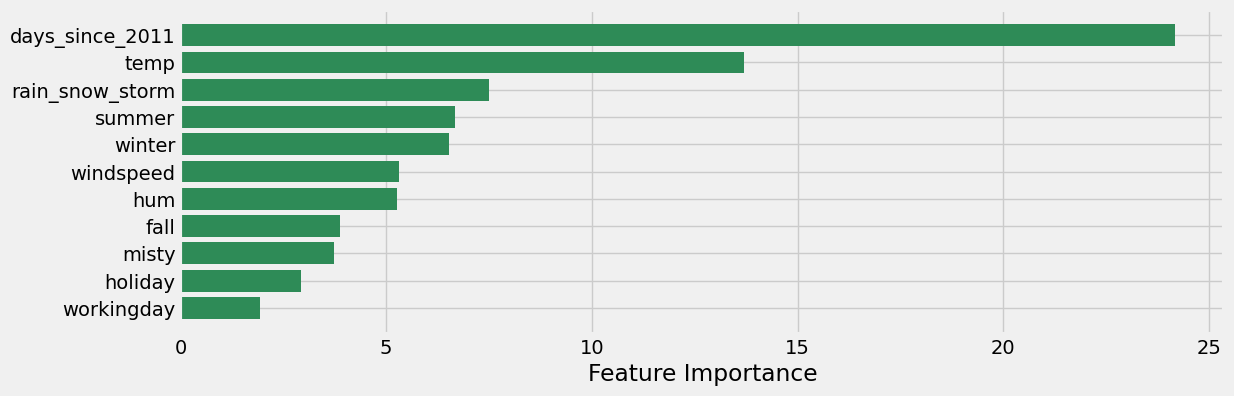

In [55]:
ins = ez_linear(model2)
ins.feature_importance()
#얼마나 중요한 역할을 하는 지 보여주는 요소. 특히 라쏘 회귀(Lasso Regression) 같은 정규화 모델에서는 불필요한 피처의 가중치를 0으로 만들어 모델을 단순화할 수 있습니다.

(            columns         coef  standard_error
 0   rain_snow_storm -1948.410565      509.826274
 1            winter  -939.388513      281.675748
 2            summer  -819.035565      240.494993
 3           holiday  -709.835146      473.861295
 4              fall  -490.700246      247.457086
 5             misty  -372.903827      195.277375
 6         windspeed   -42.656618       15.749345
 7               hum   -18.894241        7.043811
 8   days_since_2011     4.803560        0.389550
 9              temp   113.290244       16.199639
 10       workingday   166.033621      168.160809,
 <Figure size 1200x400 with 1 Axes>)

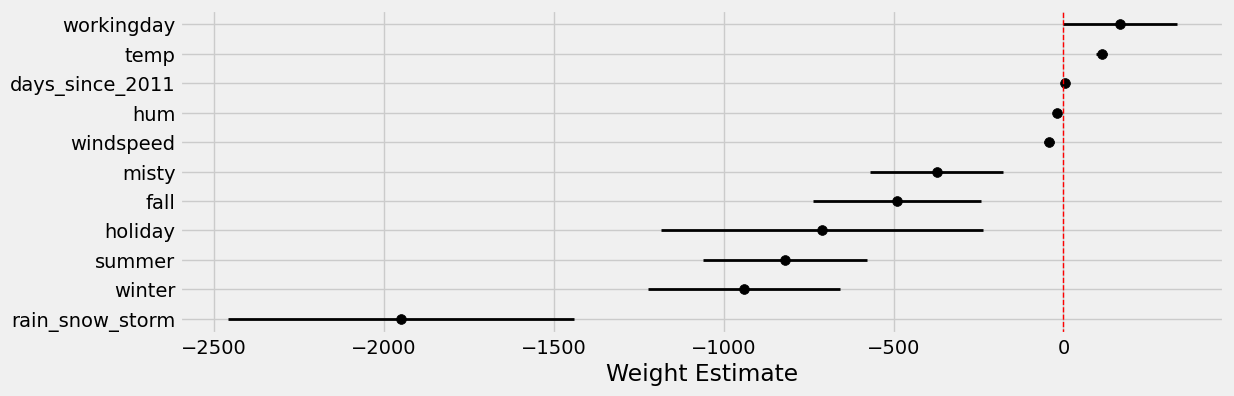

In [56]:
ins.weight_plot()

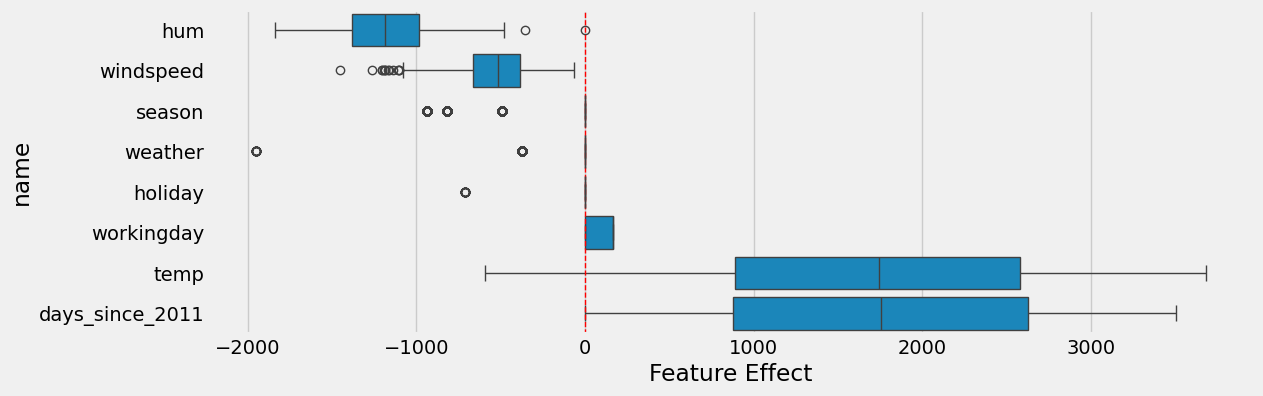

In [58]:
import seaborn as sns

cats = {'weather': ['misty', 'rain_snow_storm'], 'season': ['summer', 'fall', 'winter']}
ins.effect_plot(df, cats);

In [59]:
test_case = df.loc[123]
print(test_case)
test_case = test_case.to_dict()

instant                            124
dteday             2011-05-04 00:00:00
season                               2
yr                                   0
mnth                                 5
holiday                              0
weekday                              3
workingday                           1
weathersit                           2
temp                         11.465849
atemp                          0.40465
hum                            73.7083
windspeed                    22.042732
casual                             255
registered                        2378
cnt                               2633
summer                               0
fall                                 0
winter                               0
misty                                1
rain_snow_storm                      0
days_since_2011                    123
Name: 123, dtype: object


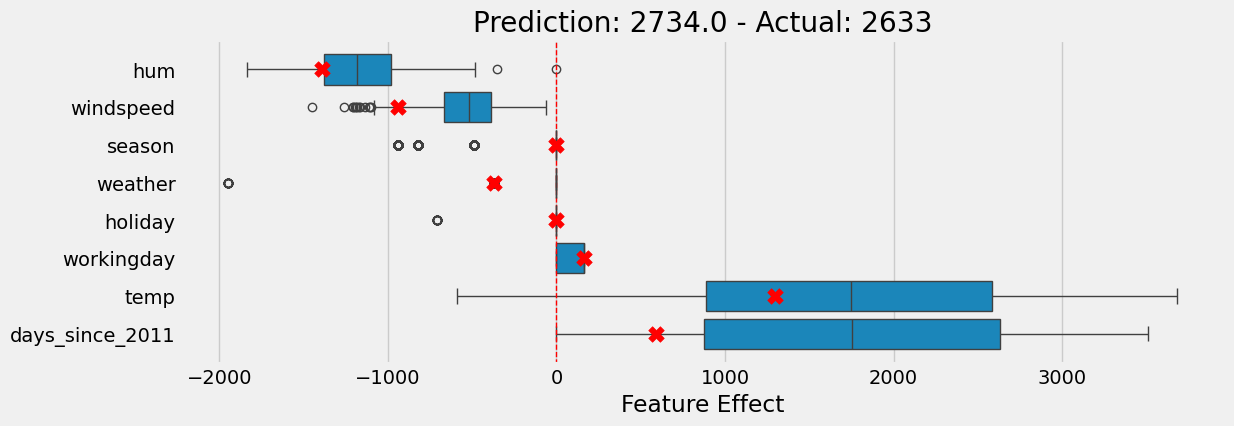

In [60]:
ins.effect_plot_with_local_pred(df, cats, test_case, 'cnt');

## III. LASSO Regression: Linear Regression with L1 Regularization

- Cost function:

$$
\ell(\beta) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - x_i^T\beta)^2 + \lambda \|\beta\|_1
$$

where $\|\beta\|_1 = \sum_{i=1}^n|\beta_i|$.
- Gradient
- Convexity
- Minimizer
- L1 regression tends to reduce many paramters to zero.
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png" width="600">

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=50.0) # alpha=1.0 is the default multiplier lambda
lasso.fit(df_train[input_cols], df_train['cnt'])
for feature, coef in zip(input_cols, lasso.coef_):
    print("%s: %.3f" % (feature, coef))

summer: -312.588
fall: -0.000
winter: -178.591
holiday: -0.000
workingday: 0.000
misty: -0.000
rain_snow_storm: -0.000
temp: 131.445
hum: -30.777
windspeed: -50.711
days_since_2011: 4.691


In [62]:
# Evaluate the performance
test_predictions = lasso.predict(df_test[input_cols])
mse = mean_squared_error(df_test['cnt'], test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_test['cnt'], test_predictions)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Mean squared error: 644382.3409435274
Root mean squared error: 802.734290374796
R2 score: 0.8317461630528548


In [63]:
# Alpha=50 suggests that the model only need 'summer', 'winter', 'temp', 'hum', 'windspeed', 'days_since_2011'
# Let's train a linear regression model using only these features.
model_small = LinearRegression()
model_small.fit(df_train[['summer', 'winter', 'temp', 'hum', 'windspeed', 'days_since_2011']], df_train['cnt'])
test_predictions = model_small.predict(df_test[['summer', 'winter', 'temp', 'hum', 'windspeed', 'days_since_2011']])
mse = mean_squared_error(df_test['cnt'], test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_test['cnt'], test_predictions)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Mean squared error: 630370.374633937
Root mean squared error: 793.9586731272208
R2 score: 0.8354048093951967


## IV. Logistic Regression
- The logistic function
$$
logistic(\eta) = \frac{1}{1 + exp(-\eta)}
$$
- The logistic regression model for binary classifier
$$
P(y = 1) = \frac{1}{1 + exp(-(\beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n))}
$$
- or
$$
\log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n
$$
- Cost function?
- Logistic regression for more than two classes?

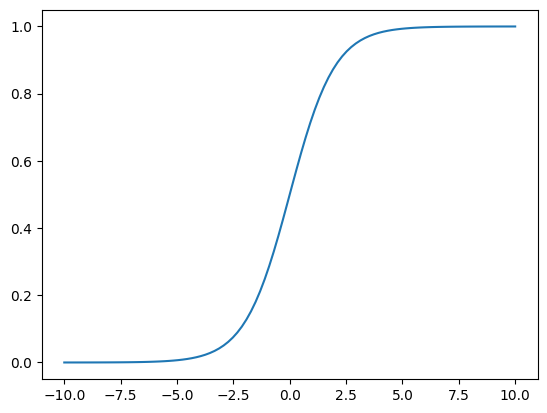

In [64]:
# The expected relation between the input and the output probability
# y = 1 / (1 + e^{-t})
xs = np.linspace(-10, 10, 100)
ys = 1 / (1 + np.exp(-xs))
plt.plot(xs, ys)

**LASSO** is a type of linear regression that uses L1 regularization to shrink the coefficients of the less important features to zero.

**Lambda (λ)** controls the strength of the regularization in LASSO regression.

*   When λ is small: The model behaves similarly to ordinary least squares regression (OLS), and most coefficients remain unchanged.
*   When λ is large: The regularization becomes stronger, pushing more coefficients toward zero, which simplifies the model by effectively removing some features.


In [65]:
import pandas as pd
df = pd.read_csv("day.csv", parse_dates=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
# Data cleaning + feature engineering # 1:winter, 2:spring, 3:summer, 4:fall
df['summer'] = df['season'].map(lambda x: 1 if x == 3 else 0)
df['fall'] = df['season'].map(lambda x: 1 if x == 4 else 0)
df['winter'] = df['season'].map(lambda x: 1 if x == 1 else 0)
df['misty'] = df['weathersit'].map(lambda x: 1 if x == 2 else 0)
df['rain_snow_storm'] = df['weathersit'].map(lambda x: 1 if x > 2 else 0)
df['dteday'] = pd.to_datetime(df['dteday'])
df['days_since_2011'] = df['dteday'].map(lambda x: (x - df.loc[0, 'dteday']).days)

df['temp'] = df['temp'] * (39 - (-8)) + (-8)
df['windspeed'] = 67 * df['windspeed']
df['hum'] = df['hum'] * 100

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,summer,fall,winter,misty,rain_snow_storm,days_since_2011
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,10.749882,331,654,985,0,0,1,1,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,16.652113,131,670,801,0,0,1,1,0,1
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,16.636703,120,1229,1349,0,0,1,0,0,2
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,10.739832,108,1454,1562,0,0,1,0,0,3
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,12.522300,82,1518,1600,0,0,1,0,0,4


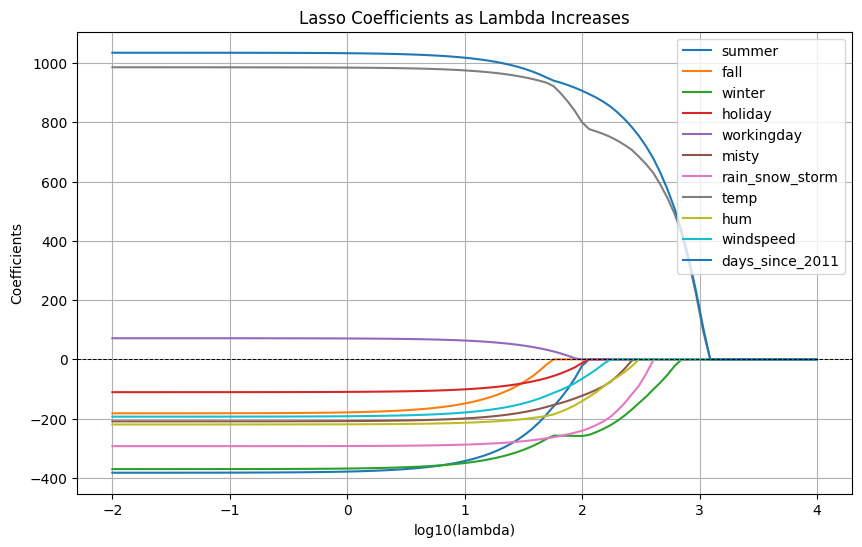

In [67]:
# Select features + target
X = df[['summer', 'fall', 'winter', 'holiday', 'workingday', 'misty', 'rain_snow_storm', 'temp', 'hum', 'windspeed', 'days_since_2011']]
y = df['cnt']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Different lambda
lambdas = np.logspace(-2, 4, 100)

#Save coefs in the list
coefs = []

# Train Lasso regression
for l in lambdas:
    lasso = Lasso(alpha=l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), coefs)
plt.xlabel('log10(lambda)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as Lambda Increases')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.legend(X.columns, loc='best')
plt.show()

This graph illustrates how the coefficients of each feature in LASSO regression change as the λ (lambda) value increases. When λ is small, most features maintain significant coefficients and contribute to the model. However, as λ increases, more coefficients shrink toward zero, simplifying the model. The important feature, temperature (temp), retains its influence for a longer time even as λ increases, while features like summer also have notable impacts but eventually approach zero as λ becomes large enough. This graph visually represents how the complexity of the model decreases as λ increases.